# 作業5範例

### 1.<br>解阻尼震盪，初始位置$10$，初始速度$0$，彈簧彈力係數$k = 1$，物體質量$m = 1$，阻力係數自設為合適的大小以形成過阻尼、臨界阻尼、欠阻尼三情況。

## $$\begin{cases}\frac{dx}{dt}=v \\ \\  F=m\frac{dv}{dt}=-kx-bv \end{cases}$$<br>整合得到$$\begin{cases}\dot{x}=v \\ \\ \dot{v}=\frac{-kx-bv}{m} \end{cases}$$<br>設$r=[x, v]$，方程式寫成$$\dot{r}=\big{[}r[1], \frac{-kx-bv}{m}\big{]}$$

## 通解 $$\begin{cases}x(t)=e^{-\frac{b}{2m}t}(Ae^{\omega t}+Be^{-\omega t}) \\ \omega=\sqrt{\frac{b^2}{4m^2}-\frac{k}{m}} \end{cases}$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def RK4(f, r_init, time_interval, h):
    sim_time = time_interval[1] - time_interval[0]
    iters = int(sim_time / h)
    
    r_list = [np.copy(r_init)]
    t_list = [time_interval[0]]
    
    r_new = np.copy(r_init)
    t = time_interval[0]
    for i in range(iters):
        k1 = h*f(r_new, t)
        k2 = h*f(r_new + k1/2, t + h/2)
        k3 = h*f(r_new + k2/2, t + h/2)
        k4 = h*f(r_new + k3, t + h)
        
        r_new += (k1 + 2*k2 + 2*k3 + k4)/6.
        t += h
    
        r_list.append(np.copy(r_new))
        t_list.append(t)
    
    return np.array(r_list), np.array(t_list)

In [57]:
global k, b, m
k = 1.
m = 1.
def f(r, t):
    return np.array([r[1], (-k*r[0] - b*r[1])/m])

In [58]:
r_init = np.array([10, 0], dtype=float)
time_interval = [0, 100]

b = 0.5
r_list, t_list = RK4(f, r_init, time_interval, 0.01)
x1_list = r_list[:, 0]

b = 2
r_list, t_list = RK4(f, r_init, time_interval, 0.01)
x2_list = r_list[:, 0]

b = 10
r_list, t_list = RK4(f, r_init, time_interval, 0.01)
x3_list = r_list[:, 0]

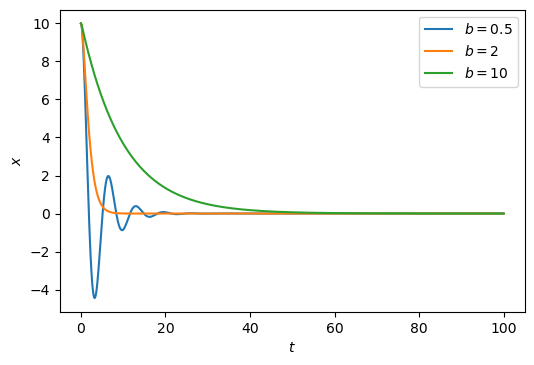

In [59]:
fig = plt.figure(dpi=100)
ax = plt.axes()
ax.plot(t_list, x1_list, label="$b=0.5$")
ax.plot(t_list, x2_list, label="$b=2$")
ax.plot(t_list, x3_list, label="$b=10$")
plt.legend()

ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
plt.show()

### 加上一個$F_0 cos⁡(\omega_0 t)$形式之外力，$F_0=1$，自訂$\omega_0=0.5、1、2$，阻力係數與上題相同的三個，做三張圖將相同阻力係數的$x(t)$作在同一張。

## $$\dot{r}=\big{[}r[1], \frac{-kx-bv+F_0 cos(\omega_0 t)}{m}\big{]}$$

In [4]:
global k, m, F0, omega0, b
k = 1.
m = 1.
F0 = 1
def f(r, t):
    return np.array([r[1], (-k*r[0] - b*r[1] + F0*np.cos(omega0*t))/m])

In [8]:
r_init = np.array([10, 0], dtype=float)
time_interval = [0, 100]

b = 0.5

omega0 = np.sqrt(1-0.25/4)
r_list, t_list = RK4(f, r_init, time_interval, 0.01)
x1_list = r_list[:, 0]

omega0 = 1
r_list, t_list = RK4(f, r_init, time_interval, 0.01)
x2_list = r_list[:, 0]

omega0 = 2
r_list, t_list = RK4(f, r_init, time_interval, 0.01)
x3_list = r_list[:, 0]

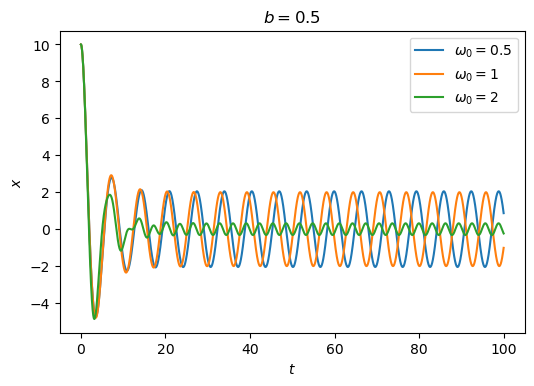

In [9]:
fig = plt.figure(dpi=100)
ax = plt.axes()
ax.set_title("$b=0.5$")
ax.plot(t_list, x1_list, label="$\omega_0=0.5$")
ax.plot(t_list, x2_list, label="$\omega_0=1$")
ax.plot(t_list, x3_list, label="$\omega_0=2$")
plt.legend()

ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
plt.show()

In [63]:
b = 2

omega0 = 0.5
r_list, t_list = RK4(f, r_init, time_interval, 0.01)
x1_list = r_list[:, 0]

omega0 = 1
r_list, t_list = RK4(f, r_init, time_interval, 0.01)
x2_list = r_list[:, 0]

omega0 = 2
r_list, t_list = RK4(f, r_init, time_interval, 0.01)
x3_list = r_list[:, 0]

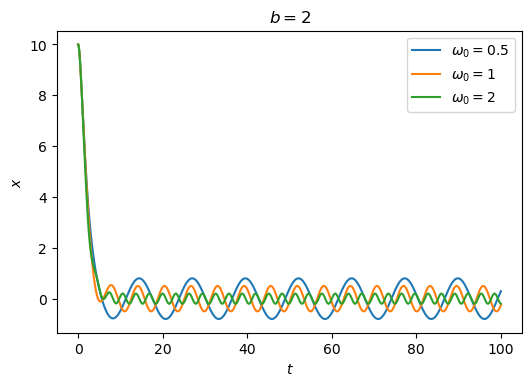

In [64]:
fig = plt.figure(dpi=100)
ax = plt.axes()
ax.set_title("$b=2$")
ax.plot(t_list, x1_list, label="$\omega_0=0.5$")
ax.plot(t_list, x2_list, label="$\omega_0=1$")
ax.plot(t_list, x3_list, label="$\omega_0=2$")
plt.legend()

ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
plt.show()

In [10]:
b = 10

omega0 = 0.5
r_list, t_list = RK4(f, r_init, time_interval, 0.01)
x1_list = r_list[:, 0]

omega0 = 1
r_list, t_list = RK4(f, r_init, time_interval, 0.01)
x2_list = r_list[:, 0]

omega0 = 2
r_list, t_list = RK4(f, r_init, time_interval, 0.01)
x3_list = r_list[:, 0]

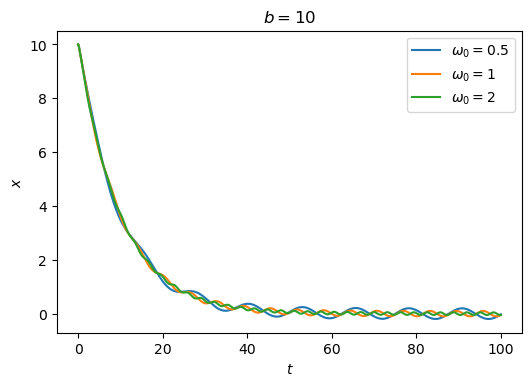

In [11]:
fig = plt.figure(dpi=100)
ax = plt.axes()
ax.set_title("$b=10$")
ax.plot(t_list, x1_list, label="$\omega_0=0.5$")
ax.plot(t_list, x2_list, label="$\omega_0=1$")
ax.plot(t_list, x3_list, label="$\omega_0=2$")
plt.legend()

ax.set_xlabel("$t$")
ax.set_ylabel("$x$")
plt.show()

### 在$b=0.5$時穩態振幅$A$對外力頻率$\omega$作圖

No handles with labels found to put in legend.


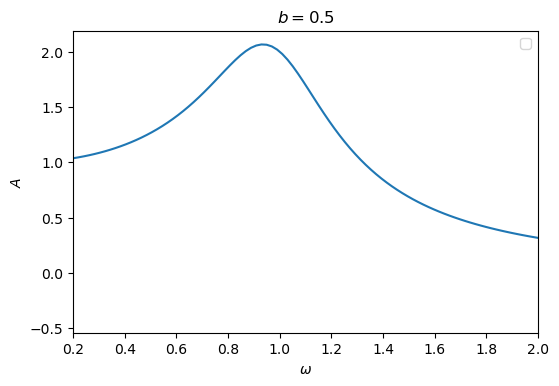

In [7]:
b = 0.5

omega = np.linspace(0.2, 2, 100)
A_list = []
for i in omega:
    omega0 = i
    r_list, t_list = RK4(f, r_init, time_interval, 0.01)
    x = r_list[-5000: -1, 0]
    A_list.append(np.max(x))
    
fig = plt.figure(dpi=100)
ax = plt.axes()
ax.set_title("$b=0.5$")
ax.plot(omega, A_list)
plt.legend()

ax.set_xlabel("$\omega$")
ax.set_ylabel("$A$")
plt.xlim(0.2, 2)
plt.show()